# Whatsapp

There has been an interesting report recently on how WhatsApp data can be used in the study of radical networks: http://www.huffingtonpost.com/entry/german-study-finds-radicalized-muslims-have-little-actual-knowledge-of-islam_us_5967f362e4b03389bb163c58 

A group of German scholars at the Universities of Bielefeld and Osnabrück analyzed 5,757 WhatsApp messages found on a phone seized by police following a terrorist attack in the spring of 2016. The messages were exchanged among 12 young men involved in the attack. The attack itself was not identified in the report. 

This tutorial is motivated by this study and shows another type of interaction with social media, where we can only download the data and not directly access it through an API.

In this tutorial, we construct the graph of distribution of messages over a given time period using your own Whatsapp data. Note that Whatsapp does not have an API (http://mashable.com/2015/03/25/whatsapp-developers-api/). But you can download your messages (or anybody else's) and analyse the download. This is an alternative method in order to work with data that you have no other access to. 


We will use prepared sample data but you can also take a look at how to download your Whatsapp messages: https://www.whatsapp.com/faq/en/general/23753886

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

whatsapp = pd.read_csv("whatsapp-output.csv")
whatsapp.head()

,SentenceNo,SequenceNo,Date,Time,Speaker,Text
0,0,1,2/12/15,8:33:07 PM,MESSAGE,You created group “Just for Fun”
1,1,2,2/12/15,8:33:30 PM,GRT,What is sagnar phone no?
2,2,3,2/12/15,8:33:56 PM,GRT,You are also an admin bangThai.
3,3,4,2/12/15,8:36:14 PM,MESSAGE,You added SKM
4,4,5,2/12/15,8:36:14 PM,MESSAGE,You added YGR


In [121]:
whatsapp.loc[whatsapp['Speaker'] == 'MESSAGE','sender'] = 'Her' 
whatsapp.loc[whatsapp['Speaker'] == 'GRT','sender'] = 'Me' 
whatsapp.head()

,SentenceNo,SequenceNo,Date,Time,Speaker,Text,sender
0,0,1,2/12/15,8:33:07 PM,MESSAGE,You created group “Just for Fun”,Her
1,1,2,2/12/15,8:33:30 PM,GRT,What is sagnar phone no?,Me
2,2,3,2/12/15,8:33:56 PM,GRT,You are also an admin bangThai.,Me
3,3,4,2/12/15,8:36:14 PM,MESSAGE,You added SKM,Her
4,4,5,2/12/15,8:36:14 PM,MESSAGE,You added YGR,Her


In [122]:
whatsapp = whatsapp.drop(columns=['Speaker', 'SentenceNo', 'SequenceNo'])
whatsapp.head()

,Date,Time,Text,sender
0,2/12/15,8:33:07 PM,You created group “Just for Fun”,Her
1,2/12/15,8:33:30 PM,What is sagnar phone no?,Me
2,2/12/15,8:33:56 PM,You are also an admin bangThai.,Me
3,2/12/15,8:36:14 PM,You added SKM,Her
4,2/12/15,8:36:14 PM,You added YGR,Her


Now let's plot two overlapping histograms to compare 'Her' and 'Me' sending messages.

In [131]:
whatsapp['datetime'] = pd.to_datetime(whatsapp['Date'].astype(str) + ' ' +whatsapp['Time'].astype(str))
whatsapp['datetime'] = whatsapp['datetime'].dt.floor('Min')

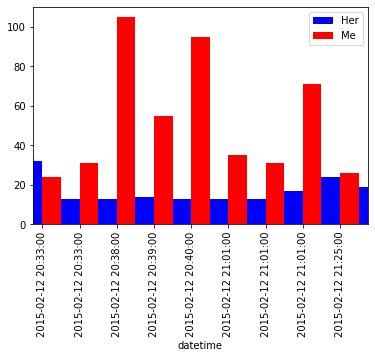

In [146]:
her = whatsapp.loc[whatsapp['sender'] == 'Her']
me = whatsapp.loc[whatsapp['sender'] == 'Me']

herplot = her.plot(kind='bar', x='datetime', y='message_length', color='blue', position=1, label='Her')
me.plot(kind='bar', x='datetime', y='message_length', color='red', ax=herplot, position=0, label='Me')

plt.show()

That's it. Blue is 'Her' sending whatsapp messages, red is 'Me'. It seems that 'Me' is chatting much more ...